<a href="https://colab.research.google.com/github/LeonardoNBanegas/DATA-SCIENCE-CODERHOUSE/blob/main/ProyectoDS_ParteIII_Banegas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # abrir una ventana para seleccionar el archivo de mi pc


Saving CRO398-A-2.csv to CRO398-A-2.csv


**Análisis de la Calidad de resepción de Servicio en una Red HFC a Nivel de Portadoras QAM* : Caso Telecom Argentina

Este proyecto se enfoca en el análisis detallado de un dataset que contiene información de 4868 portadoras de downstream y upstream pertenecientes a 161 cablemódems de una red HFC de Telecom Argentina. El objetivo principal es evaluar la calidad de servicio de DS y US (QoS) a nivel de portadora y, por extensión, deducir la calidad de experiencia de los usuarios finales.

El dataset, estructurado en un archivo CSV, incluye una amplia gama de métricas de la señal RF, como frecuencia, modulación, niveles de potencia, y ratios de error. A través de técnicas de análisis de datos, se busca identificar patrones, correlaciones y anomalías que permitan comprender los factores que influyen en la degradación de la señal y, consecuentemente, en la calidad de servicio.

**Preguntas de Investigación*:

¿Qué características de las portadoras (frecuencia, modulación, SNR, CER, CCER etc.) están más asociadas con una mayor degradación de la señal?
¿Existen diferencias significativas en la QoS entre portadoras de diferentes cablemódems (con 36, 10 o 2 portadoras)?
¿Cómo afecta la cantidad de portadoras asignadas a un cablemódem en la calidad de la señal y la experiencia del usuario?
¿Es posible construir modelos predictivos para identificar proactivamente portadoras con alto riesgo de degradación?

**Metodología:*

Se llevará a cabo un análisis exploratorio de los datos para identificar patrones y relaciones entre las variables

**Objetivos*:

**Evaluar la QoS*: Determinar el nivel de calidad de servicio ofrecido a los usuarios finales, considerando factores como la estabilidad de la señal, la corrección de paquetes y la tasa de errores en el espectro dedicado a la modulación QAM.
**Identificar factores críticos*: Identificar las variables que más influyen en la degradación de la señal y la calidad de servicio percibida por los usuarios.
**Desarrollar modelos predictivos*: Construir modelos que permitan predecir la ocurrencia de eventos que afecten la QoS, como fallas en el equipo o interferencias en la red.

**Hipótesis*

**Hipótesis 1*: Existe una correlación significativa entre las métricas de calidad de señal (SNR, MER, atenuación) y la calidad de servicio  de percibida por los usuarios.
**Hipótesis 2*: Los cablemódems con un menor número de portadoras asignadas presentan una mayor variabilidad en la calidad de señal y son más propensos a experimentar degradaciones.
**Hipótesis 3*: Las condiciones de la red (interferencias, ruido) tienen un impacto directo en la calidad de servicio, especialmente en las portadoras ubicadas en los extremos del espectro de frecuencias.

**Resultados esperados*:

Los resultados de este proyecto permitirán a Telecom Argentina identificar las áreas de la red que requieren mayor atención y optimizar los recursos para garantizar una experiencia de usuario de alta calidad. Además, los modelos desarrollados podrán ser utilizados como herramientas de soporte para la toma de decisiones en la gestión de la red, posibles acciones a tomar por parte de la gestión operativa de la compañia.
1-Generar un contacto con los abonados para acordar una visita técnica de forma proactiva.
2-Enviar una encuesta de satisfacción del servicio.
3-dentificar si la falla se relaciona con ingresos de ruido a la red.
4-identificar si es un cliente Promotor o Detractor
5-Promo/Descuento


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk


# Cargar el archivo CSV
df = pd.read_csv('CRO398-A-2.csv')

# Mostrar las primeras filas
print(df.head())

# Ver el tamaño del dataset
print(df.shape)


   Row Number        MAC Address          Channel Name Partial Service  \
0           1  44:D4:54:B7:4D:34  Cable1/0/3-upstream4            none   
1           2  A0:39:EE:99:D9:30  Cable1/0/3-upstream0            none   
2           3  44:D4:54:A0:E1:47  Cable1/0/3-upstream4            none   
3           4  E4:C0:E2:13:05:4E  Cable1/0/3-upstream1            none   
4           5  E4:C0:E2:13:05:4E  Cable1/0/3-upstream5            none   

   Frequency (MHz) Modulation  Status  Tx Power (dBmV)  Rx Power (dBmV)  \
0             75.4     QAM-64  Online             48.5              7.0   
1             38.6     QAM-64  Online             44.5              8.0   
2             75.4     QAM-64  Online             41.8              7.0   
3             32.2     QAM-64  Online             48.5              7.0   
4             81.8     QAM-64  Online             50.3              7.0   

   Attenuation (dB)  ... SNR Deviation (σ)  CCER+CER (%)  CER (%)  \
0              41.5  ...           

In [3]:
# identificar valores nulos
df.info()
#sumar valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row Number                           4868 non-null   int64  
 1   MAC Address                          4868 non-null   object 
 2   Channel Name                         4868 non-null   object 
 3   Partial Service                      4868 non-null   object 
 4   Frequency (MHz)                      4868 non-null   float64
 5   Modulation                           4868 non-null   object 
 6   Status                               4868 non-null   object 
 7   Tx Power (dBmV)                      571 non-null    float64
 8   Rx Power (dBmV)                      4868 non-null   float64
 9   Attenuation (dB)                     571 non-null    float64
 10  MER (dB)                             4297 non-null   object 
 11  SNR (dB)                      

,0
Row Number,0
MAC Address,0
Channel Name,0
Partial Service,0
Frequency (MHz),0
Modulation,0
Status,0
Tx Power (dBmV),4297
Rx Power (dBmV),0
Attenuation (dB),4297


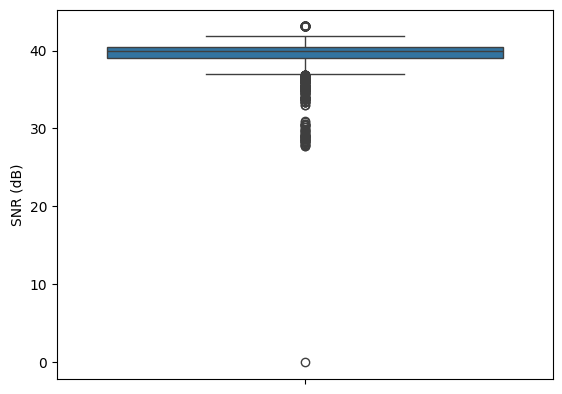

In [4]:
# identificar outliers de la columna SNR (dB)
sns.boxplot(y=df['SNR (dB)'])
plt.show()

In [5]:
# ver en pantalla si el dato es nulo o no
print(df.isnull())

      Row Number  MAC Address  Channel Name  Partial Service  Frequency (MHz)  \
0          False        False         False            False            False   
1          False        False         False            False            False   
2          False        False         False            False            False   
3          False        False         False            False            False   
4          False        False         False            False            False   
...          ...          ...           ...              ...              ...   
4863       False        False         False            False            False   
4864       False        False         False            False            False   
4865       False        False         False            False            False   
4866       False        False         False            False            False   
4867       False        False         False            False            False   

      Modulation  Status  T

In [7]:
# estadisticas de las columnas numéricas
df.describe()

,Row Number,Frequency (MHz),Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Deviation of Echo Response (σ)
count,4868.000000,4868.000000,571.000000,4868.000000,571.000000,4868.000000,4868.000000,4868.000000,4868.000000,4297.000000,571.000000
mean,2434.500000,627.481758,47.792820,1.571549,40.803327,39.611011,0.223521,0.007549,0.000357,29.161973,0.000757
std,1405.414885,219.378809,3.817196,4.945049,3.962186,1.756538,0.238995,0.157276,0.006688,8.680112,0.003361
min,1.000000,32.200000,36.300000,-11.300000,29.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000041
25%,1217.750000,627.000000,45.000000,-2.500000,38.000000,39.100000,0.100000,0.000000,0.000000,29.000000,0.000123
50%,2434.500000,681.000000,47.800000,1.800000,40.800000,40.000000,0.100000,0.000000,0.000000,31.000000,0.000215
75%,3651.250000,735.000000,50.500000,5.800000,43.500000,40.500000,0.300000,0.000000,0.000000,34.000000,0.000367
max,4868.000000,837.000000,56.700000,14.500000,59.000000,43.100000,3.200000,6.184800,0.268600,45.000000,0.055377


In [8]:
#agrupar las Macs por modelo de Docsis de acuerdo a la cantidad de portadoras que utilizan
df['MAC Address'].value_counts()
value_counts = df['MAC Address'].value_counts()
value_counts

,count
MAC Address,
44:D4:54:B7:4D:34,36
6C:BA:B8:ED:A4:49,36
F4:C1:14:ED:23:04,36
6C:BA:B8:EF:F1:CA,36
5C:76:95:4A:DA:F4,36
...,...
4C:12:65:FC:51:C0,10
98:F7:81:4F:F5:18,10
4C:12:65:FC:02:A5,10


In [75]:
# matriz de correlacion del data frame
correlation_matrix = df.select_dtypes(include=np.number).corr()
show_correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm')
show_correlation_matrix

,Row Number,Frequency (MHz),Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Deviation of Echo Response (σ)
Row Number,1.000000,-0.085036,-0.023898,-0.404906,0.009074,-0.746149,0.283156,0.069571,0.032295,-0.389897,0.042210
Frequency (MHz),-0.085036,1.000000,0.128967,-0.392233,0.144384,-0.035656,-0.649756,0.012408,0.019003,0.061963,-0.034554
Tx Power (dBmV),-0.023898,0.128967,1.000000,-0.147380,0.987185,0.049620,-0.001031,-0.022988,-0.013746,nan,-0.078048
Rx Power (dBmV),-0.404906,-0.392233,-0.147380,1.000000,-0.303329,0.275115,0.130626,-0.005034,-0.051797,0.027893,-0.080475
Attenuation (dB),0.009074,0.144384,0.987185,-0.303329,1.000000,0.012840,-0.008524,-0.025023,-0.018841,nan,-0.062208
SNR (dB),-0.746149,-0.035656,0.049620,0.275115,0.012840,1.000000,-0.107568,-0.250333,-0.009169,0.549221,-0.027703
SNR Deviation (σ),0.283156,-0.649756,-0.001031,0.130626,-0.008524,-0.107568,1.000000,-0.009919,0.002434,-0.013306,0.006017
CCER+CER (%),0.069571,0.012408,-0.022988,-0.005034,-0.025023,-0.250333,-0.009919,1.000000,0.058723,-0.134755,0.055819
CER (%),0.032295,0.019003,-0.013746,-0.051797,-0.018841,-0.009169,0.002434,0.058723,1.000000,0.022607,0.022952
Spectral Response (dB),-0.389897,0.061963,nan,0.027893,nan,0.549221,-0.013306,-0.134755,0.022607,1.000000,nan


In [59]:
#agrupar y modificar por modelo de Docsis
Docsis_31 = value_counts[value_counts == 36].index
Docsis_30 = value_counts[value_counts == 10].index
Docsis_20 = value_counts[value_counts == 2].index
docsis_model_mapping = {}
for mac in Docsis_31:
    docsis_model_mapping[mac] = 'Docsis 3.1'
for mac in Docsis_30:
    docsis_model_mapping[mac] = 'Docsis 3.0'
for mac in Docsis_20:
    docsis_model_mapping[mac] = 'Docsis 2.0'
print(docsis_model_mapping)

{'44:D4:54:B7:4D:34': 'Docsis 3.1', '6C:BA:B8:ED:A4:49': 'Docsis 3.1', 'F4:C1:14:ED:23:04': 'Docsis 3.1', '6C:BA:B8:EF:F1:CA': 'Docsis 3.1', '5C:76:95:4A:DA:F4': 'Docsis 3.1', '08:7E:64:92:42:AC': 'Docsis 3.1', '58:2F:F7:0B:38:8A': 'Docsis 3.1', '84:01:12:31:47:8D': 'Docsis 3.1', 'EC:BE:DD:AA:9B:00': 'Docsis 3.1', '08:7E:64:AA:63:AC': 'Docsis 3.1', 'D0:57:94:75:03:37': 'Docsis 3.1', '54:47:CC:4F:56:55': 'Docsis 3.1', '90:58:51:56:86:04': 'Docsis 3.1', 'B0:BB:E5:45:01:D8': 'Docsis 3.1', 'D0:57:94:6B:FC:68': 'Docsis 3.1', '08:7E:64:40:66:2C': 'Docsis 3.1', '98:9D:5D:4E:97:E4': 'Docsis 3.1', 'B8:66:85:EC:F0:05': 'Docsis 3.1', '48:4B:D4:42:5D:F4': 'Docsis 3.1', '48:4B:D4:41:E3:84': 'Docsis 3.1', '58:2F:F7:95:C2:D6': 'Docsis 3.1', '84:01:12:33:A3:E7': 'Docsis 3.1', 'D0:CF:0E:E4:A9:F9': 'Docsis 3.1', '98:77:E7:C9:71:24': 'Docsis 3.1', '6C:99:61:F0:1F:A3': 'Docsis 3.1', '50:6F:0C:D1:52:DF': 'Docsis 3.1', '38:3F:B3:E3:44:74': 'Docsis 3.1', '84:1E:A3:8F:39:46': 'Docsis 3.1', '30:24:78:67:D9:78'

In [60]:
# Contar las ocurrencias de cada versión de Docsis
from collections import Counter

docsis_counts = Counter(docsis_model_mapping.values())

# Imprimir los conteos
print(docsis_counts)

# Acceder a conteos individuales
print(f"Docsis 3.1: {docsis_counts['Docsis 3.1']}")
print(f"Docsis 3.0: {docsis_counts['Docsis 3.0']}")
print(f"Docsis 2.0: {docsis_counts['Docsis 2.0']}")

# Obtener el número total de dispositivos
total_devices = sum(docsis_counts.values())
print(f"Total de Dispositivos: {total_devices}")


Counter({'Docsis 3.1': 111, 'Docsis 3.0': 27, 'Docsis 2.0': 1})
Docsis 3.1: 111
Docsis 3.0: 27
Docsis 2.0: 1
Total de Dispositivos: 139


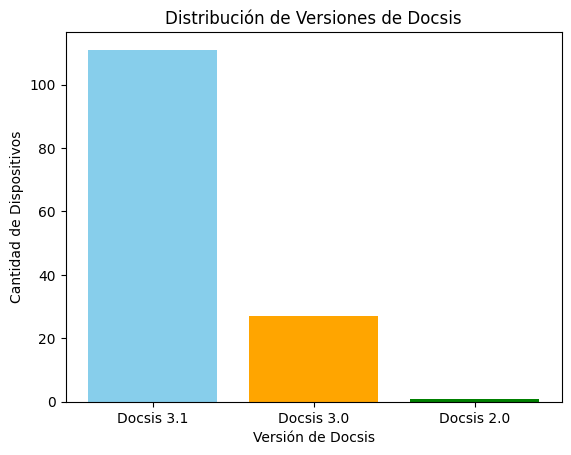

In [61]:
#grafico de barras de modelos Docsis
# Crear el gráfico de barras
colors = ['skyblue', 'orange', 'green']
plt.bar(docsis_counts.keys(), docsis_counts.values(),color=colors)

# Agregar etiquetas y título
plt.xlabel("Versión de Docsis")
plt.ylabel("Cantidad de Dispositivos")
plt.title("Distribución de Versiones de Docsis")

# Mostrar el gráfico
plt.show()

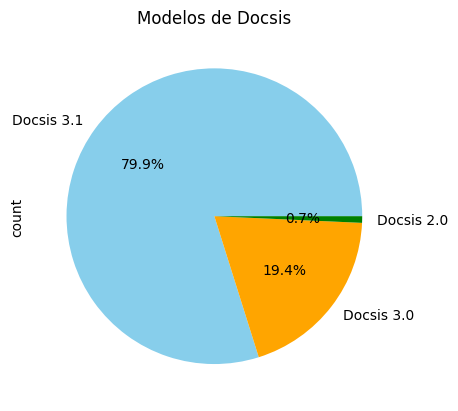

In [35]:
# Convertir el diccionario a una serie de Pandas
docsis_model_series = pd.Series(docsis_model_mapping).value_counts()
# grafico de torta de modelos Docsis
colors = ['skyblue', 'orange', 'green']
docsis_model_series.plot(kind='pie', autopct='%1.1f%%', labels=docsis_model_series.index, colors=colors)
plt.title('Modelos de Docsis')
plt.show()
#cambiar color del grfico de torta'skyblue', 'orange'

In [77]:
# crear un nuevo dataframe solo de downstream borrando columnas de upstream
df_DS = df.drop(['Tx Power (dBmV)','Attenuation (dB)','Composite Equalization [NMTER] (dB)','Group Response [PREMTTER] (dB)','Echo Response [POSTMTTER] (dB)','Deviation of Echo Response (σ)'], axis=1)
df_DS.info()
#eliminar colomn Row Number
df_DS = df_DS.drop(['Row Number'], axis=1)
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Row Number              4868 non-null   int64  
 1   MAC Address             4868 non-null   object 
 2   Channel Name            4868 non-null   object 
 3   Partial Service         4868 non-null   object 
 4   Frequency (MHz)         4868 non-null   float64
 5   Modulation              4868 non-null   object 
 6   Status                  4868 non-null   object 
 7   Rx Power (dBmV)         4868 non-null   float64
 8   MER (dB)                4297 non-null   object 
 9   SNR (dB)                4868 non-null   float64
 10  SNR Deviation (σ)       4868 non-null   float64
 11  CCER+CER (%)            4868 non-null   float64
 12  CER (%)                 4868 non-null   float64
 13  Spectral Response (dB)  4297 non-null   float64
 14  Latest Proactive Scan   4868 non-null   

In [79]:
# matriz de correlacion del df_DS
correlation_matrix = df_DS.select_dtypes(include=np.number).corr()
show_correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm')
show_correlation_matrix

,Frequency (MHz),Rx Power (dBmV),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB)
Frequency (MHz),1.000000,-0.392233,-0.035656,-0.649756,0.012408,0.019003,0.061963
Rx Power (dBmV),-0.392233,1.000000,0.275115,0.130626,-0.005034,-0.051797,0.027893
SNR (dB),-0.035656,0.275115,1.000000,-0.107568,-0.250333,-0.009169,0.549221
SNR Deviation (σ),-0.649756,0.130626,-0.107568,1.000000,-0.009919,0.002434,-0.013306
CCER+CER (%),0.012408,-0.005034,-0.250333,-0.009919,1.000000,0.058723,-0.134755
CER (%),0.019003,-0.051797,-0.009169,0.002434,0.058723,1.000000,0.022607
Spectral Response (dB),0.061963,0.027893,0.549221,-0.013306,-0.134755,0.022607,1.000000


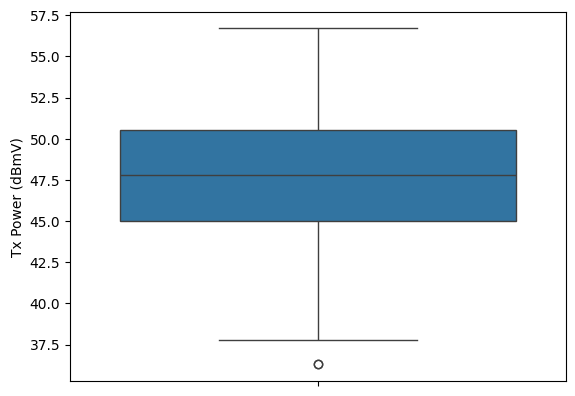

In [80]:
# crear un nuevo df solo con las filas QAM-64(US) upstream
df_US = df.loc[df['Modulation'] == 'QAM-64']
df_US
#identificar outliers de la columna Tx Power
# TX < 40dBmV = baja/falla
# TX > 53dBmV = alta/falla
sns.boxplot(y=df_US['Tx Power (dBmV)'])
plt.show()

In [81]:
# matriz de correlacion del df_US
correlation_matrix = df_US.select_dtypes(include=np.number).corr()
show_correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm')
show_correlation_matrix

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Row Number,Frequency (MHz),Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Deviation of Echo Response (σ)
Row Number,1.000000,-0.262084,-0.023898,-0.198939,0.009074,-0.631488,-0.125855,0.035277,0.010435,nan,0.042210
Frequency (MHz),-0.262084,1.000000,0.128967,-0.124803,0.144384,0.170543,0.184947,-0.155616,-0.043117,nan,-0.034554
Tx Power (dBmV),-0.023898,0.128967,1.000000,-0.147380,0.987185,0.049620,-0.001031,-0.022988,-0.013746,nan,-0.078048
Rx Power (dBmV),-0.198939,-0.124803,-0.147380,1.000000,-0.303329,0.216707,0.046677,0.017826,0.034695,nan,-0.080475
Attenuation (dB),0.009074,0.144384,0.987185,-0.303329,1.000000,0.012840,-0.008524,-0.025023,-0.018841,nan,-0.062208
SNR (dB),-0.631488,0.170543,0.049620,0.216707,0.012840,1.000000,0.155161,-0.010596,-0.001055,nan,-0.027703
SNR Deviation (σ),-0.125855,0.184947,-0.001031,0.046677,-0.008524,0.155161,1.000000,-0.052497,-0.015651,nan,0.006017
CCER+CER (%),0.035277,-0.155616,-0.022988,0.017826,-0.025023,-0.010596,-0.052497,1.000000,0.090816,nan,0.055819
CER (%),0.010435,-0.043117,-0.013746,0.034695,-0.018841,-0.001055,-0.015651,0.090816,1.000000,nan,0.022952
Spectral Response (dB),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [43]:
# identificar dato Tx Power < a 37
df_US.loc[df_US['Tx Power (dBmV)'] < 37]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),...,SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
2644,2645,D0:6E:DE:8E:DD:E9,Cable1/0/3-upstream1,none,32.2,QAM-64,Online,36.3,7.0,29.3,...,0.6,0.0106,0.0,NaN,-24.9,-40.1,-25,0.000178,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
3765,3766,D0:6E:DE:8E:DD:E9,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,36.3,7.0,29.3,...,0.5,0.0023,0.0,NaN,-25.9,-36.4,-26.3,0.000306,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [90]:
#imputarle la moda a las filas con Tx Power < a 37
df_US.loc[df_US['Tx Power (dBmV)'] < 37, 'Tx Power (dBmV)'] = df_US['Tx Power (dBmV)'].mode()[0]
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 4867
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row Number                           571 non-null    int64  
 1   MAC Address                          571 non-null    object 
 2   Channel Name                         571 non-null    object 
 3   Partial Service                      571 non-null    object 
 4   Frequency (MHz)                      571 non-null    float64
 5   Modulation                           571 non-null    object 
 6   Status                               571 non-null    object 
 7   Tx Power (dBmV)                      571 non-null    float64
 8   Rx Power (dBmV)                      571 non-null    float64
 9   Attenuation (dB)                     571 non-null    float64
 10  MER (dB)                             0 non-null      object 
 11  SNR (dB)                            

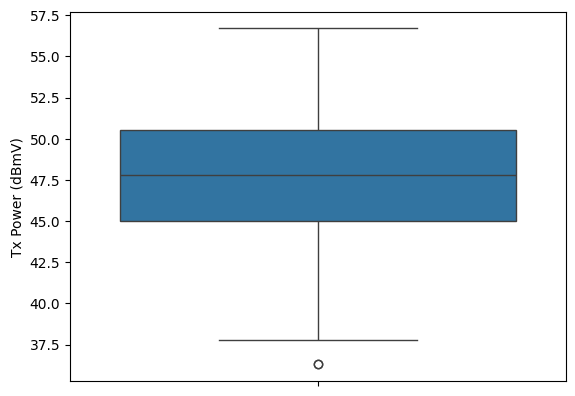

In [83]:
#identificar outliers de la columna Tx Power
# TX < 40dBmV = baja/falla
# TX > 53dBmV = alta/falla
sns.boxplot(y=df_US['Tx Power (dBmV)'])
plt.show()

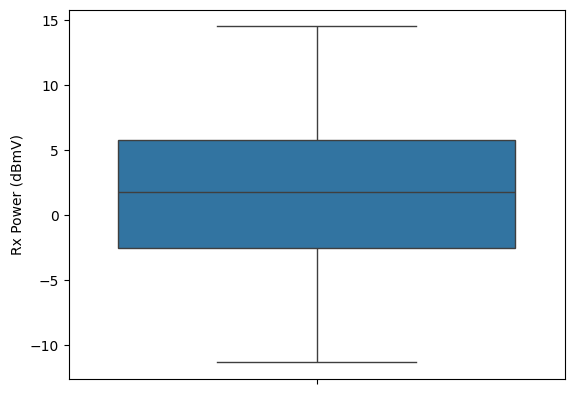

In [82]:
# identificar outliers de la columna Rx Power (dB)
# Rx < -10dBmV = baja/falla
# Rx > 10dBmV = alta/falla
sns.boxplot(y=df_DS['Rx Power (dBmV)'])
plt.show()

In [91]:
# Imputar la media a los datos nulos de la columna MER (db)
# Convertir la columna 'MER (dB)' a numérica, manejando errores
df_DS['MER (dB)'] = pd.to_numeric(df_DS['MER (dB)'], errors='coerce')
df_DS['MER (dB)'].fillna(df_DS['MER (dB)'].mean(), inplace=True)
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAC Address             4868 non-null   object 
 1   Channel Name            4868 non-null   object 
 2   Partial Service         4868 non-null   object 
 3   Frequency (MHz)         4868 non-null   float64
 4   Modulation              4868 non-null   object 
 5   Status                  4868 non-null   object 
 6   Rx Power (dBmV)         4868 non-null   float64
 7   MER (dB)                4868 non-null   float64
 8   SNR (dB)                4868 non-null   float64
 9   SNR Deviation (σ)       4868 non-null   float64
 10  CCER+CER (%)            4868 non-null   float64
 11  CER (%)                 4868 non-null   float64
 12  Spectral Response (dB)  4297 non-null   float64
 13  Latest Proactive Scan   4868 non-null   object 
 14  Latest Outage Scan      4868 non-null   

<ipython-input-91-1410de9a315c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_DS['MER (dB)'].fillna(df_DS['MER (dB)'].mean(), inplace=True)


In [92]:
# Imputar la media a los datos nulos de la columna Spectral Response (dB)
# Convertir la columna 'Spectral Response (dB)' a numérica, manejando errores
df_DS['Spectral Response (dB)'] = pd.to_numeric(df_DS['Spectral Response (dB)'], errors='coerce')
df_DS['Spectral Response (dB)'].fillna(df_DS['Spectral Response (dB)'].mean(), inplace=True)
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAC Address             4868 non-null   object 
 1   Channel Name            4868 non-null   object 
 2   Partial Service         4868 non-null   object 
 3   Frequency (MHz)         4868 non-null   float64
 4   Modulation              4868 non-null   object 
 5   Status                  4868 non-null   object 
 6   Rx Power (dBmV)         4868 non-null   float64
 7   MER (dB)                4868 non-null   float64
 8   SNR (dB)                4868 non-null   float64
 9   SNR Deviation (σ)       4868 non-null   float64
 10  CCER+CER (%)            4868 non-null   float64
 11  CER (%)                 4868 non-null   float64
 12  Spectral Response (dB)  4868 non-null   float64
 13  Latest Proactive Scan   4868 non-null   object 
 14  Latest Outage Scan      4868 non-null   

<ipython-input-92-607561de6a00>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_DS['Spectral Response (dB)'].fillna(df_DS['Spectral Response (dB)'].mean(), inplace=True)


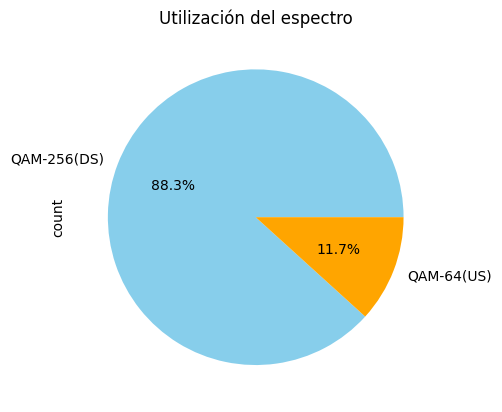

In [93]:
# grafico de torta de la columna Modulation
colors = ['skyblue', 'orange', 'green']
df['Modulation'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['QAM-256(DS)', 'QAM-64(US)'],colors=colors)
plt.title('Utilización del espectro')
plt.show()
# en este gráfico se aprecia que un 88.3% del espectro se usa para la descarga


In [94]:
# Mostrar los nombres de todas las columnas en el DataFrame DS
print(df_DS.columns)

Index(['MAC Address', 'Channel Name', 'Partial Service', 'Frequency (MHz)',
       'Modulation', 'Status', 'Rx Power (dBmV)', 'MER (dB)', 'SNR (dB)',
       'SNR Deviation (σ)', 'CCER+CER (%)', 'CER (%)',
       'Spectral Response (dB)', 'Latest Proactive Scan',
       'Latest Outage Scan'],
      dtype='object')


In [95]:
# Mostrar los nombres de todas las columnas en el DataFrame US
print(df_US.columns)

Index(['Row Number', 'MAC Address', 'Channel Name', 'Partial Service',
       'Frequency (MHz)', 'Modulation', 'Status', 'Tx Power (dBmV)',
       'Rx Power (dBmV)', 'Attenuation (dB)', 'MER (dB)', 'SNR (dB)',
       'SNR Deviation (σ)', 'CCER+CER (%)', 'CER (%)',
       'Spectral Response (dB)', 'Composite Equalization [NMTER] (dB)',
       'Group Response [PREMTTER] (dB)', 'Echo Response [POSTMTTER] (dB)',
       'Deviation of Echo Response (σ)', 'Latest Proactive Scan',
       'Latest Outage Scan'],
      dtype='object')


In [65]:
#eliminar columna 'Rx Power (dBmV)' de df_US
df_US = df_US.drop(['Rx Power (dBmV)','MER (dB)','Spectral Response (dB)'], axis=1)
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 4867
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row Number                           571 non-null    int64  
 1   MAC Address                          571 non-null    object 
 2   Channel Name                         571 non-null    object 
 3   Partial Service                      571 non-null    object 
 4   Frequency (MHz)                      571 non-null    float64
 5   Modulation                           571 non-null    object 
 6   Status                               571 non-null    object 
 7   Tx Power (dBmV)                      571 non-null    float64
 8   Attenuation (dB)                     571 non-null    float64
 9   SNR (dB)                             571 non-null    float64
 10  SNR Deviation (σ)                    571 non-null    float64
 11  CCER+CER (%)                        

In [67]:
#seleccionar cpes con SNR menor a 32dBmV en US (Relación Señal Ruido bajo en portadoras upstream)
df.loc[(df["SNR (dB)"] < 32) & (df['Modulation'] == 'QAM-64')]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),...,SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
4818,4819,84:17:EF:31:46:28,Cable1/0/3-upstream5,other(1),81.8,QAM-64,Online,54.0,-5.0,59.0,...,0.3,0.0,0.0,NaN,-10.8,-24.5,-11,0.010756,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4867,4868,48:29:52:33:5B:5B,Cable1/0/3-upstream1,other(1),32.2,QAM-64,Online,40.3,7.0,33.3,...,0.0,0.0,0.0,NaN,--,--,--,0.000188,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


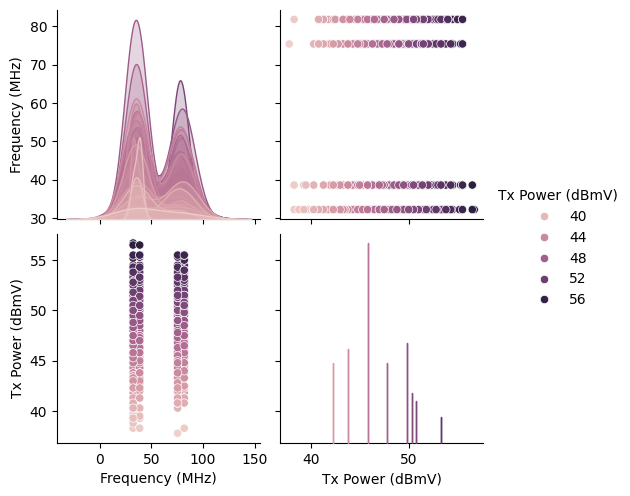

In [109]:
#matriz de disperción de df_US
#matriz de disperción de df_US
#relación entre variables potencia, frecuencia y atenuación en US

sns.pairplot(df_US, vars=['Frequency (MHz)','Tx Power (dBmV)'], hue='Tx Power (dBmV)')
plt.show()

In [110]:
#seleccionar cpes con CER (perdida de paquetes en DS) distinto de cero en DS
df.loc[(df["CER (%)"] > 0.1 ) & (df['Modulation'] == 'QAM-256')]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),...,SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
2002,2003,98:52:4A:42:7D:24,Integrated-Cable1/0/0-downstream20,none,723.0,QAM-256,Online,NaN,-3.7,NaN,...,0.1,0.1648,0.1116,34.0,NaN,NaN,NaN,NaN,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
3487,3488,08:7E:64:3C:32:F4,Integrated-Cable1/0/3-downstream30,none,831.0,QAM-256,Online,NaN,-1.3,NaN,...,0.4,0.1544,0.1216,35.0,NaN,NaN,NaN,NaN,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4134,4135,98:52:4A:42:7D:24,Integrated-Cable1/0/0-downstream29,none,825.0,QAM-256,Online,NaN,-5.9,NaN,...,0.2,0.3762,0.2686,33.0,NaN,NaN,NaN,NaN,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4223,4224,98:52:4A:42:7D:24,Integrated-Cable1/0/0-downstream30,none,831.0,QAM-256,Online,NaN,-5.9,NaN,...,0.2,0.3433,0.2483,33.0,NaN,NaN,NaN,NaN,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [111]:
#seleccionar cpes en Partial Service en US
#AQUI VEMOS 2 CMs DE CLIENTES CON FALLAS EN UPSTREAM, A LOS CUALES SE LES PODRIA ENVIAR UN TECNICO ANTES DE QUE GENEREN UN RECLAMO O SEAN CLIENTES DETRACTORES
df.loc[(df['Partial Service'] != 'none') & (df['Modulation'] == 'QAM-64')]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),...,SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
4818,4819,84:17:EF:31:46:28,Cable1/0/3-upstream5,other(1),81.8,QAM-64,Online,54.0,-5.0,59.0,...,0.3,0.0,0.0,NaN,-10.8,-24.5,-11,0.010756,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4867,4868,48:29:52:33:5B:5B,Cable1/0/3-upstream1,other(1),32.2,QAM-64,Online,40.3,7.0,33.3,...,0.0,0.0,0.0,NaN,--,--,--,0.000188,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [ ]:
# ver solo la columna status
df['Status']

,Status
0,Online
1,Online
2,Online
3,Online
4,Online
...,...
4863,Online
4864,Online
4865,Online
4866,Online


In [ ]:
# ver solo los cpes offline
#LOS CPES PUEDEN ESTAR OFF LINE POR DIFERENTES MOTIVOS RELACIONADOS O NO LA RED, CON ESTOS DATOS SE PUEDE HACER UN ANALISIS MAS PROFUNDO UE INCLUYA DATOS GEOREFERENCIADOS DONDE SE PODRIA INTENTAR PRECISAR SI ES UNA FALLA MASIVA O NO, Y DISPARAR UNA ALARMA DE OUTAGE
df.loc[df['Status'] == 'Offline']

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),...,SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
2549,2550,18:B8:1F:F9:54:FE,Cable1/0/3-upstream0,none,38.6,QAM-64,Offline,47.5,7.0,40.5,...,0.5,0.0000,0.0,NaN,-27.6,-30.2,-30.9,0.000158,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
2789,2790,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream6,none,639.0,QAM-256,Offline,NaN,5.1,NaN,...,0.1,0.0000,0.0,36.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
2790,2791,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream7,none,645.0,QAM-256,Offline,NaN,5.3,NaN,...,0.0,0.0000,0.0,36.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
2949,2950,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream5,none,633.0,QAM-256,Offline,NaN,4.7,NaN,...,0.0,0.0000,0.0,36.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3211,3212,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream0,none,603.0,QAM-256,Offline,NaN,4.4,NaN,...,0.1,0.0000,0.0,30.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3212,3213,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream4,none,627.0,QAM-256,Offline,NaN,4.3,NaN,...,0.0,0.0000,0.0,36.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3334,3335,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream1,none,609.0,QAM-256,Offline,NaN,4.2,NaN,...,0.1,0.0000,0.0,35.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3335,3336,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream2,none,615.0,QAM-256,Offline,NaN,4.1,NaN,...,0.1,0.0000,0.0,33.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3336,3337,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream3,none,621.0,QAM-256,Offline,NaN,4.0,NaN,...,0.1,0.0000,0.0,38.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
4525,4526,18:B8:1F:F9:54:FE,Cable1/0/3-upstream1,none,32.2,QAM-64,Offline,47.5,7.0,40.5,...,1.4,0.0022,0.0,NaN,-26,-31.2,-27.5,0.000364,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"


In [ ]:
# seleccionar cpes con potencia de retorno alta (TX > a 53dBmV)
tx_alta = df.loc[(df['Tx Power (dBmV)'] > 53) & (df['Modulation'] == 'QAM-64')]
print(tx_alta.head())

      Row Number        MAC Address          Channel Name Partial Service  \
5              6  44:05:3F:63:57:A0  Cable1/0/3-upstream5            none   
31            32  4C:12:65:FB:EF:CD  Cable1/0/3-upstream1            none   
33            34  A0:FF:70:86:0B:D4  Cable1/0/3-upstream4            none   
2246        2247  44:05:3F:63:57:A0  Cable1/0/3-upstream4            none   
2282        2283  54:47:CC:50:31:2A  Cable1/0/3-upstream4            none   

      Frequency (MHz) Modulation  Status  Tx Power (dBmV)  Rx Power (dBmV)  \
5                81.8     QAM-64  Online             55.0              7.0   
31               32.2     QAM-64  Online             53.5              7.5   
33               75.4     QAM-64  Online             54.5              7.0   
2246             75.4     QAM-64  Online             53.5              7.0   
2282             75.4     QAM-64  Online             54.5              7.0   

      Attenuation (dB)  ... SNR Deviation (σ)  CCER+CER (%)  CER (%)

In [ ]:
tx_alta

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),...,SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
5,6,44:05:3F:63:57:A0,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,55.0,7.0,48.0,...,1.1,0.0000,0.0,NaN,-20,-20.4,-31.7,0.000084,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
31,32,4C:12:65:FB:EF:CD,Cable1/0/3-upstream1,none,32.2,QAM-64,Online,53.5,7.5,46.0,...,0.7,0.0000,0.0,NaN,-24.2,-31.7,-25,0.000141,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
33,34,A0:FF:70:86:0B:D4,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,54.5,7.0,47.5,...,0.8,0.0000,0.0,NaN,-26.2,-30.3,-28.4,0.000200,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2246,2247,44:05:3F:63:57:A0,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,53.5,7.0,46.5,...,0.5,0.0000,0.0,NaN,-27.5,-35.9,-28.2,0.000147,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2282,2283,54:47:CC:50:31:2A,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,54.5,7.0,47.5,...,0.5,0.0000,0.0,NaN,-25.6,-29.7,-27.7,0.000149,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2324,2325,84:01:12:33:A3:E7,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,53.5,7.0,46.5,...,0.5,0.0027,0.0,NaN,-18.6,-20.7,-22.9,0.000414,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2408,2409,10:D7:B0:F5:F3:3D,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,53.3,7.0,46.3,...,0.7,0.0000,0.0,NaN,-21.9,-32.8,-22.3,0.000482,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2446,2447,98:F7:81:4F:F5:18,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,54.3,6.5,47.8,...,0.9,0.0604,0.0,NaN,-27.8,-29.6,-32.5,0.000111,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2463,2464,3C:B7:4B:58:13:44,Cable1/0/3-upstream1,none,32.2,QAM-64,Online,54.0,7.0,47.0,...,0.4,0.0000,0.0,NaN,-30.8,-35.1,-32.9,0.000056,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2464,2465,3C:B7:4B:58:13:44,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,54.5,7.0,47.5,...,0.8,0.0000,0.0,NaN,-30.5,-36.9,-31.6,0.000076,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [ ]:
#seleccionar cpes con potencia de recepción baja ( RX < -10 dBmV)
rx_baja = df.loc[(df['Rx Power (dBmV)'] < -10) & (df['Modulation'] == 'QAM-256')]
# Mostrar las primeras filas
print(rx_baja.head())

      Row Number        MAC Address                        Channel Name  \
3976        3977  C0:3C:04:EF:F2:5E  Integrated-Cable1/0/3-downstream21   
3977        3978  C0:3C:04:EF:F2:5E  Integrated-Cable1/0/3-downstream23   
3978        3979  C0:3C:04:EF:F2:5E  Integrated-Cable1/0/3-downstream24   
3979        3980  C0:3C:04:EF:F2:5E  Integrated-Cable1/0/3-downstream27   
4039        4040  C0:3C:04:EF:F2:5E  Integrated-Cable1/0/3-downstream20   

     Partial Service  Frequency (MHz) Modulation  Status  Tx Power (dBmV)  \
3976            none            729.0    QAM-256  Online              NaN   
3977            none            741.0    QAM-256  Online              NaN   
3978            none            747.0    QAM-256  Online              NaN   
3979            none            813.0    QAM-256  Online              NaN   
4039            none            723.0    QAM-256  Online              NaN   

      Rx Power (dBmV)  Attenuation (dB)  ... SNR Deviation (σ)  CCER+CER (%)  \
3976  

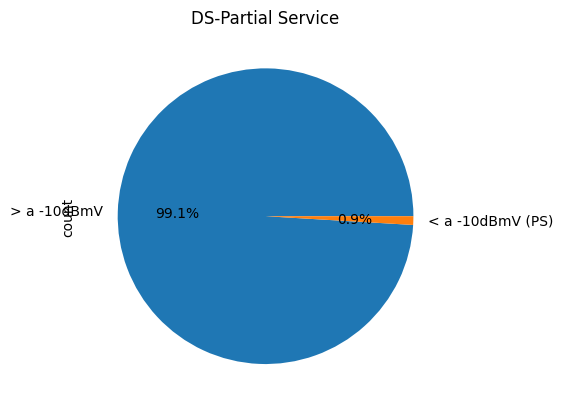

In [ ]:
#grafico de torta cantidad de CMs menores y mayores a -10dBmV.
# Crear una serie booleana que indique si el valor es mayor o menor a -10
rx_power = df['Rx Power (dBmV)']
mayor_a_menos_10 = rx_power > -10

# Contar los valores mayores y menores a -10
conteo = mayor_a_menos_10.value_counts()

# Graficar la torta
conteo.plot(kind='pie', autopct='%1.1f%%', labels=['> a -10dBmV', '< a -10dBmV (PS)'])
plt.title('DS-Partial Service')
plt.show()


In [ ]:
# mostrar solo canales de US
df.loc[(df['Modulation'] == 'QAM-64')]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),...,SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
0,1,44:D4:54:B7:4D:34,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,48.5,7.0,41.5,...,0.9,0.0000,0.0000,NaN,-26.4,-27.7,-32.2,0.000065,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
1,2,A0:39:EE:99:D9:30,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,44.5,8.0,36.5,...,1.7,0.0114,0.0006,NaN,-28.7,-29.9,-34.6,0.000099,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2,3,44:D4:54:A0:E1:47,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,41.8,7.0,34.8,...,0.7,0.0000,0.0000,NaN,-25.9,-29.6,-28.4,0.000141,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
3,4,E4:C0:E2:13:05:4E,Cable1/0/3-upstream1,none,32.2,QAM-64,Online,48.5,7.0,41.5,...,1.0,0.0000,0.0000,NaN,-29.1,-44.3,-29.3,0.012931,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4,5,E4:C0:E2:13:05:4E,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,50.3,7.0,43.3,...,1.0,0.0000,0.0000,NaN,-17.4,-20.8,-20,0.000808,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,4636,D8:33:B7:B0:F0:82,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,53.3,5.0,48.3,...,0.8,0.0000,0.0000,NaN,-26.9,-31,-29,0.000111,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4636,4637,98:77:E7:0F:6D:11,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,55.5,6.0,49.5,...,0.9,0.0000,0.0000,NaN,-29.1,-42.4,-29.3,0.000125,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4637,4638,98:77:E7:0F:6D:11,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,55.5,3.5,52.0,...,0.6,0.0000,0.0000,NaN,-17.3,-23.9,-18.3,0.001169,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4765,4766,84:1E:A3:91:13:24,Cable1/0/0-upstream1,none,32.2,QAM-64,Online,45.8,7.0,38.8,...,1.2,0.0000,0.0000,NaN,-26.4,-41,-26.5,0.000255,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


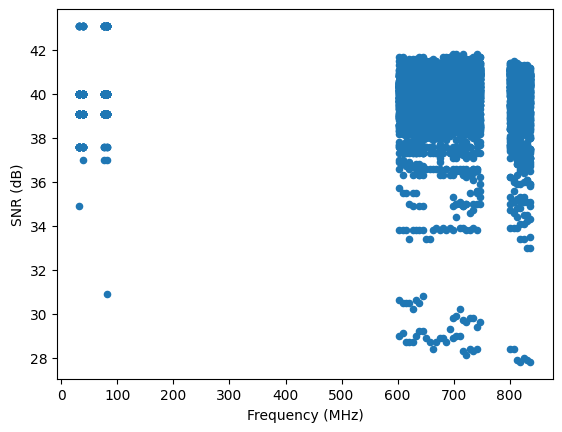

In [ ]:
# gráfico de dispersión SNR por frecuencia
df.plot(x='Frequency (MHz)', y='SNR (dB)', kind='scatter')
plt.show()
# acá se puede apreciar la distribución de portadoras en el espectro y su relación Señal-Ruido.

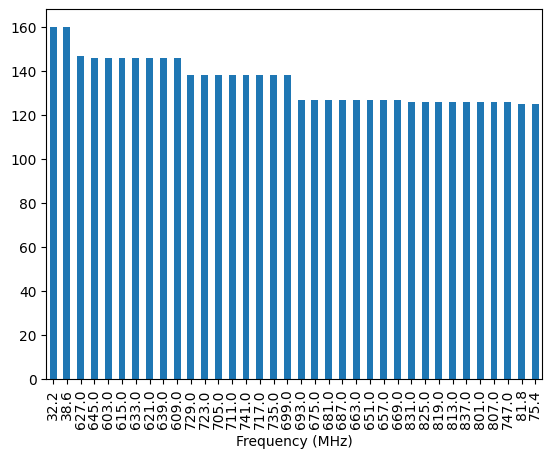

In [ ]:
#cantidad de CMs por portadora
df['Frequency (MHz)'].value_counts().plot(kind='bar')
plt.show()
#aqui se puede ver que la parte del espectro más utilizada son las primeras 2 portadoras de modulación QAM-64, 32.2 y 38.6 MHz

In [ ]:
# crear un cluster que agrupe los cms con falla US y DS para mandar un técnico



